In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Εισάγουμε τις βοηθητικές συναρτήσεις απο το auxiliary.py
from auxiliary import *

# Επίλυση προβλήματος βελτιστοποίησης με γενετικούς αλγορίθμους


## 1 Ένα απλό παράδειγμα προβλήματος ελαχιστοποίησης

Ας θεωρήσουμε ότι ψάχνουμε να βρούμε την ελάχιστη τιμή της συνάρτησης
$$
   y(x) = -x \, \sin{(x)}
$$
στο διάστημα $[0, 4\,\pi]$.

Η συνάρτηση $y(x)$ είναι η *συνάρτηση μοντέλο* και σχετίζεται άμεσα με την *αντικειμενική συνάρτηση* που θα εξηγήσουμε πιο κάτω. Η έξοδός της μας χρησιμεύει για να υπολογίζουμε τις *αντικειμενικές τιμές* που αποτελούν το βασικό στοιχείο για να αποφασίσουμε αν μια τιμή $x$ είναι καλή ή κακή.

Εκτυπώνουμε τη συνάρτηση:

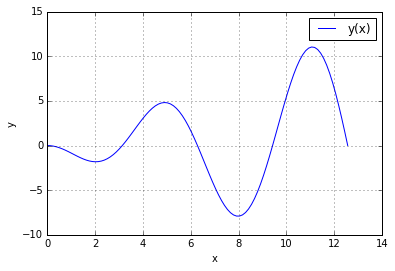

In [3]:
# model function
def y(x): return -x * sin(x)

# plot model function
xcurve = linspace(0.0, 4*pi, 101)
plt.plot(xcurve, y(xcurve), label='y(x)')
Gll('x', 'y')

Παρατηρούμε ότι η συνάρτηση στο διάστημα που εξετάζουμε έχει τόσο τοπικό ελάχιστο όσο και ολικό ελάχιστο. Το πρώτο είναι περίπου στο $x=2$ και το δεύτερο περίπου στο $x=8$ (για την ακρίβεια το ολικό ελάχιστο που προκύπτει αναλυτικά στο συγκεκριμένο διάστημα ορισμού είναι $-7.9167$ για $x=7.9786$ περίπου). Η παρουσία τοπικών ελαχίστων μπορεί να δυσκολέψει συμβατικές μεθόδους επίλυσης, εκεί που  ακόμα και απλοί γενετικοί αλγόριθμοι μπορούν να επιτύχουν.

## 2 Πληθυσμός

Ξεκινάμε θεωρώντας ότι δεν έχουμε καμία ιδέα για το ποια μπορεί να είναι η λύση, δηλαδή το $x$ τέτοιο ώστε το $y(x)$ να είναι ένα ολικό ελάχιστο.

Για αρχή ας δημιουργήσουμε τιμές του $x$ μεταξύ $0$ και $4\,\pi$ ελπίζοντας ότι κάποιες θα είναι καλές υποψήφιες λύσεις:

In [13]:
# initialise random numbers generator
seed(1234) # use a fixed seed, so every time we run this code
           # we will get the same results

# population
ninds = 10                   # number of individuals: population size
xmin, xmax = 0.0, 4.0*pi      # limits
X = Random(ninds, xmin, xmax) # generate numbers between 0 and 4*pi

# just for the sake of showing nice numbers in this notebook:
X = array(X, dtype=int)    # truncate values
X = array(X, dtype=float)  # revert to float
print 'Population:\n', X

Population:
[  2.   7.   5.   9.   9.   3.   3.  10.  12.  11.]


Για λόγους οπτικοποίησης θα τυπώσουμε αυτές τις τιμές του  **αρχικού πληθυσμού** πάνω στη γραφική παράσταση της συνάρτησης:

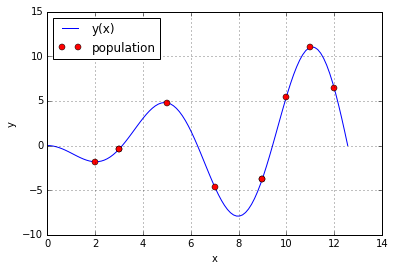

In [10]:
plt.plot(xcurve, y(xcurve), label='y(x)')
plt.plot(X, y(X), 'ro', label='population')
Gll('x', 'y', 'upper left')

Διαπιστώνουμε ότι στο διάστημα $0$ με $4\,\pi$ έχουμε τρεις καλές υποψήφιες λύσεις $x=7$, $x=9$ και ξανά $x=9$

Στην ορολογία των γενετικών, κάθε μια από αυτές τις τιμές $x \in X$ αποτελεί ένα *άτομο* και το σύνολό τους συνιστά έναν **πληθυσμό**.

## 3 Χρωμοσώματα

Κάθε άτομο μπορεί να διαιρεθεί περαιτέρω σε **γονίδια**, το σύνολο των οποίων ορίζει το **χρωμόσωμα** του ατόμου. Θα μπορούσαμε να χρησιμοποιήσουμε διαφόρων τύπων υποδιαιρέσεις του $x$ αλλά εδώ θα χρησιμοποιήσουμε μια απλή τυχαία υποδιαίρεση.

Για παράδειγμα, για $x=10$ μπορούμε να πάρουμε το χρωμόσωμά του ως εξής:

In [14]:
ngenes = 5
c10 = SimpleChromo(10, ngenes)
print c10, ' sum(c10) =', sum(c10)

[ 1.36299497  1.90838702  2.60344209  2.71481942  1.41035651]  sum(c10) = 10.0


όπου η ποσότητα 10 έχει χωριστεί σε 5 τιμές το άθροισμα των οποίων δίνει ξανά 10. Συνεπώς το **μοντέλο αναπαράστασης** που αντιστοιχίζει τα γονίδια και το χρωμόσωμα στο άτομο είναι μια απλή πρόσθεση.

Ορίζουμε για μελλοντική χρήση δύο συναρτήσεις που μας δίνουν το χρωμόσωμα από ένα άτομο  και το άτομο από ένα χρωμόσωμα:

In [15]:
# compute chromosome from x
def cFcn(x): return SimpleChromo(x, ngenes)

# compute x from chromosome
def xFcn(c): return sum(c)

Κατά τη διαδικασία της *αναπαραγωγής* τα γονίδια των χρωμοσωμάτων από τους διάφορους γονείς θα αναμειχθούν και θα τροποποιηθούν με τις διαδικασίες της διασταύρωσης και της μετάλλαξης.

Υπολογίζουμε στον πίνακα C τα χρωμοσώματα για όλα τα άτομα του πληθυσμού $Χ$:

In [16]:
C = array([cFcn(x) for x in X]) # gia ka8e upopshfia 
print C

[[ 0.41060397  0.36808509  0.0100738   0.56544519  0.64579195]
 [ 1.08337805  1.82716448  0.22381343  1.09507037  2.77057367]
 [ 1.19639854  0.72954948  1.44867556  0.58193889  1.04343753]
 [ 2.64666194  1.32823291  2.44269558  0.43779794  2.14461163]
 [ 1.98182211  0.61541092  2.60143591  1.24363834  2.55769271]
 [ 0.1149472   0.35418089  0.09101199  1.29705202  1.1428079 ]
 [ 0.81185791  0.06595221  0.85466942  0.50185418  0.76566627]
 [ 0.5860678   3.1802927   2.96424287  0.03542806  3.23396856]
 [ 2.46215014  2.13391105  2.67798732  2.58815334  2.13779814]
 [ 1.59580625  3.49603024  2.67464504  1.09468404  2.13883444]]


## 4 Αντικειμενική συνάρτηση

Η **αντικειμενική συνάρτηση** (ή συνάρτηση αποτίμησης) είναι όμοια με τη *συνάρτηση μοντέλο* αλλά επιπρόσθετα επιβάλλει και τον περιορισμό του διαστήματος $0 \leq x \leq 4\,\pi$. Για να το επιτύχουμε αυτό, μια τεχνική είναι να επιβάλουμε μια υψηλή ποινή στις τιμές που είναι εκτός του διαστήματος. 

Επιπρόσθετα είναι βολικό να υλοποιήσουμε την αντικειμενική συνάρτηση ως συνάρτηση του χρωμοσώματος.

Μια επιλογή αντικειμενικής συνάρτησης θα μπορούσε να είναι: 

In [17]:
def objFcn(c):
    x = xFcn(c)
    if x < xmin or x > xmax: return 100.0*(1.0+abs(x))
    return y(x)

όπου χρησιμοποιούμε την τιμή $100(1+|x|)$ ως ποινή για τιμές του $x$ εκτός $[0, 4\,\pi]$.

Μπορούμε να τυπωσουμε όλες τις  **αντικειμενικές τιμές** ως εξής:

In [18]:
Y = array([objFcn(c) for c in C]) # objective values
PrintPop(C, Y, xFcn, showC=True)

      x      y                    chromosome/genes
   2.00  -1.82   0.411  0.368  0.010  0.565  0.646
   7.00  -4.60   1.083  1.827  0.224  1.095  2.771
   5.00   4.79   1.196  0.730  1.449  0.582  1.043
   9.00  -3.71   2.647  1.328  2.443  0.438  2.145
   9.00  -3.71   1.982  0.615  2.601  1.244  2.558
   3.00  -0.42   0.115  0.354  0.091  1.297  1.143
   3.00  -0.42   0.812  0.066  0.855  0.502  0.766
  10.00   5.44   0.586  3.180  2.964  0.035  3.234
  12.00   6.44   2.462  2.134  2.678  2.588  2.138
  11.00  11.00   1.596  3.496  2.675  1.095  2.139


όπου $x$ τα *άτομα*, $y$ οι *αντικειμενικές τιμές* και οι τελευταίες 5 στήλες το *χρωμόσωμα* κάθε ατόμου με τα 5 *γονίδια*.

## 5 Καταλληλότητα και ταξινόμηση

Πριν το στάδιο της αναπαραγωγής θα πρέπει να επιλεχθούν άτομα (σε ζευγάρια) από τον πληθυσμό. Για το λόγο αυτό πρέπει να οριστεί μία συνάρτηση *καταλληλότητας* (fitness function).

Για το πρόβλημα ελαχιστοποίησής μας, η συνάρτηση καταλληλότητας $f(x)$ μπορεί να είναι απλά μια συνάρτηση που αντιστοιχίζει γραμμικά τα $y(x)$ στο διάστημα  $[0, 1]$ με τον ακόλουθο τρόπο:
$$
    f(x) = \frac{y_{max} - y(x)}{y_{max} - y_{min}}
$$
Κατά αυτό τον τρόπο, αν το $x_{best}$ είναι τέτοιο ώστε $y(x_{best})=y_{min}$, τότε  $f(x_{best})=1$. Αντίθετα, αν το $x_{worst}$ είναι τέτοιο ώστε $y(x_{worst})=y_{max}$, τότε $f(x_{worst})=0$. Συνεπώς, $1$ σημαίνει "καλό" άτομο (καταλληλότερο) και $0$ σημαίνει "κακό".

Επιπρόσθετα, για τους επόμενους υπολογισμούς ο πληθυσμός πρέπει να **ταξινομηθεί** σε φθίνουσα σειρά καταλληλότητας, δηλαδή στην κορυφή να βρίσκονται τα καλύτερα άτομά του.

Μπορούμε να υπολογίσουμε την καταλληλότητα των ατόμων και να τα ταξινομήσουμε ως εξής:

In [19]:
# compute fitness from objective values
F = Fitness(Y)                

# sort in decreasing order of fitness
C, Y, F = SortPop(C, Y, F)
PrintPop(C, Y, xFcn, F)

      x      y  fitness
   7.00  -4.60    1.000
   9.00  -3.71    0.943
   9.00  -3.71    0.943
   2.00  -1.82    0.822
   3.00  -0.42    0.732
   3.00  -0.42    0.732
   5.00   4.79    0.398
  10.00   5.44    0.356
  12.00   6.44    0.292
  11.00  11.00    0.000


Διαπιστώνουμε ότι τα άτομα με $x=7$ και $x=9$ (υπάρχουν δύο τέτοια άτομα) είναι μεταξύ των καλύτερων (μικρότερη τιμή $y$). Αυτό το είχαμε διαπιστώσει και οπτικά στη γραφική παράσταση καθώς τα αντίστοιχα σημεία είναι κοντά στο ολικό ελάχιστο.

## 6 Πιθανότητες

Το επόμενο βήμα πριν επιλέξουμε άτομα είναι να υπολογίσουμε την **πιθανότητα** κάθε ατόμο να εισέλθει στο στάδιο της αναπαραγωγής. Αυτό το επιτυγχάνουμε με απλό τρόπο διαιρώντας την κάθε τιμή καταλληλότητας με το άθροισμα όλων των τιμών καταλληλότητας:
$$
p_i = \frac{f_i}{\sum_k^{nind} f_k}
$$
όπου $p_i$ είναι η πιθανότητα του ατόμου $i$ με $x_i$.

Στη συνέχεια θα μας χρειαστεί και η συσσωρευτική πιθανότητα οπότε χρησιμοποιούμε το $Μ$ για για να αποθηκεύσουμε τις αντίστοιχες τιμές.

In [20]:
# probabilities
P = F / sum(F)

# cumulated probabilities
M = cumsum(P)
PrintPop(C, Y, xFcn, F, P, M)

      x      y  fitness     prob cum.prob
   7.00  -4.60    1.000    0.161    0.161
   9.00  -3.71    0.943    0.152    0.312
   9.00  -3.71    0.943    0.152    0.464
   2.00  -1.82    0.822    0.132    0.596
   3.00  -0.42    0.732    0.118    0.714
   3.00  -0.42    0.732    0.118    0.832
   5.00   4.79    0.398    0.064    0.896
  10.00   5.44    0.356    0.057    0.953
  12.00   6.44    0.292    0.047    1.000
  11.00  11.00    0.000    0.000    1.000


## 7 (Φυσική) Επιλογή

Στην απλή μορφή ενός γενετικού αλγόριθμου είναι σύνηθες να αντικαθιστούμε έναν πληθυσμό με τον ίδιο αριθμό ατόμων. Συνεπώς για έναν πληθυσμό με $N_{ind}$ άτομα πρέπει να διαλέξουμε $N_{ind}/2$ ζευγάρια.

Η επιλογή πρέπει να γίνει κατά τέτοιο τρόπο ώστε η γενετική πληροφορία των καταλληλότερων ατόμων να έχει μεγαλύτερες πιθανότητες επιβίωσης, δηλαδή να περάσει στην επόμενη γενιά. Για να το πετύχουμε αυτό θα χρησιμοποιήσουμε τις πιθανότητες (επιβίωσης) των ατόμων που υπολογίσαμε προηγουμένως.

Μια απλή μέθοδος για να να πραγματοποιήσουμε μια τέτοια μεροληπτική επιλογή είναι ο αποκαλούμενος **μηχανισμός ρουλέτας**. Στη μέθοδο αυτή, μπορούμε να φανταστούμε ότι η ρουλέτα είναι έτσι φτιαγμένη ώστε κάθε τμήμα της (θα ήταν αριθμός σε μια κανονική ρουλέτα) που αντιστοιχεί σε κάθε άτομο είναι φτιαγμένο έτσι ώστε να έχει μέγεθος ανάλογο της πιθανότητας του αριθμού. Η ρουλέτα περιστρέφεται προς τη μία κατεύθυνση και η μπίλια ρίχνεται μέσα της προς την αντίθετη κατεύθυνση. Ένα άτομο επιλέγεται όταν η μπίλια κάτσει στο τμήμα που του αντιστοιχεί. Η διαδικασία επαναλαμβάνεται ώστε να διαλέξουμε περισσότερα άτομα. Προφανώς μπορεί να διαλέξουμε το ίδιο άτομο περισσότερες φορές. 

Για να οπτικοποιήσουμε τον αλγόριθμο επιλογής του μηχανισμού ρουλέτας, δημιουργούμε το ακόλουθο γράφημα όπου τα τμήματα που αντιστοιχούν στα άτομα κατανέμονται κατά τον οριζόντιο άξονα:

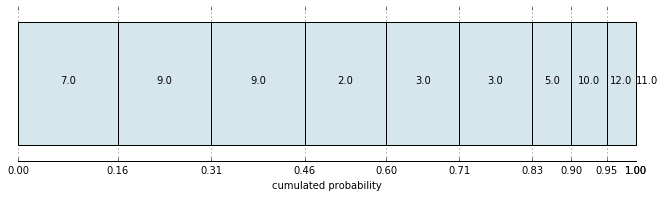

In [21]:
X = xFcn(C.T) # we first sort the individuals by decreasing fitness value
PlotProbBins(X, P)

Παρατηρούμε ότι τα τμήματα με $x=7$ και $x=9$ είναι τα μεγαλύτερα.

Ας υποθέσουμε ότι θέλουμε να διαλέξουμε 5 άτομα. Πρώτα δημιουργούμε 5 τυχαίους αριθμούς στο $[0, 1)$ 

In [39]:
sample = random(5)
print sample

[ 0.25261576  0.34800879  0.18258873  0.90179605  0.70652816]


Στη συνέχεια με τη βοήθεια του σχήματος και των συσσωρευτικών πιθανοτήτων βλέπουμε ποια άτομα επιλέγονται με βάση τους τυχαίους αριθμούς. 

Το βοηθητικό αρχείο auxiliary.py περιλαμβάνει μια συνάρτηση που υλοποιεί το μηχανισμό ρουλέτας:

In [40]:
S = RouletteSelect(M, 5, sample)
print 'indices of selected individuals:\n', S

indices of selected individuals:
[1 2 1 7 4]


## 8 Διασταύρωση

Αφού επιλεχθούν τα άτομα υπάρχει πιθανότητα ($p_{c}$) το γενετικό τους υλικό να αναμειχθεί κατά την αναπαραγωγή. Αυτή η διαδικασία είναι γνωστή ως *διασταύρωση*. Υπολογιστικά η διασταύρωση πραγματοποιείται επιλέγοντας τυχαία το σημείο διασταύρωσης ($pos$) μεταξύ των γονιδίων το οποίο χρησιμοποιείται για να αντιγράψουμε μερικώς το χρωμόσωμα κάθε γονέα στη νέα γενιά.

Ένα παράδειγμα θα ήταν το ακόλουθο:

In [46]:
# crossover between the first two individuals
pos = randint(1, ngenes-1)
A, B = C[0], C[1]
a = hstack([A[:pos], B[pos:]])
b = hstack([B[:pos], A[pos:]])
print 'pos =', pos
print 'parent A =', A
print 'parent B =', B
print 'child  a =', a
print 'child  b =', b

pos = 1
parent A = [ 1.08337805  1.82716448  0.22381343  1.09507037  2.77057367]
parent B = [ 1.98182211  0.61541092  2.60143591  1.24363834  2.55769271]
child  a = [ 1.08337805  0.61541092  2.60143591  1.24363834  2.55769271]
child  b = [ 1.98182211  1.82716448  0.22381343  1.09507037  2.77057367]


το οποίο μπορούμε να απεικονίσουμε και σχηματικά:

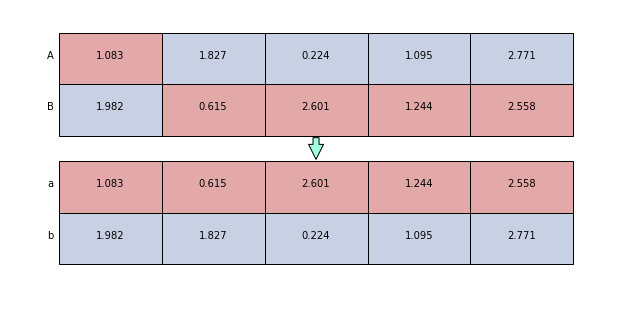

In [47]:
DrawCrossover(A, B, a, b, pos)

όπου βλέπουμε ότι οι απόγονοι έχουν γενετικό υλικό και από τους δύο γονείς.

 ## 9 Μετάλλαξη

Με μικρή πιθανότητα ($p_m$) και αρκετά σπάνια τα γονίδια του χρωμοσώματος τροποποιούνται τυχαία. Αυτό αντιπροσωπεύει το φαινόμενο της *μετάλλαξης* και βοηθάει στην ανακάλυψη νέων τιμών δεδομένων που ιδανικά θα μας είναι χρήσιμα (θα είναι πιο κοντά στο βέλτιστο). Φυσικά η μετάλλαξη μπορεί να οδηγήσει και σε χειρότερα άτομα, ωστόσο η φυσική επιλογή θα μας προστατεύσει από το να επιβιώσουν τέτοια χειρότερα άτομα σε επόμενες γενεές.

Η επίδραση του φαινομένου της μετάλλαξης είναι να διευρύνει το **χώρο αναζήτησης λύσεων** και είναι βασικός παράγοντας για να αποφεύγουμε να παγιδευόμαστε σε τοπικά ελάχιστα.

Μαθηματικά θα μπορούσαμε να χρησιμοποιήσουμε πάρα πολλές διαφορετικές στρατηγικές μετάλλαξης. Ωστόσο, γενικά η στρατηγική προκύπτει από την ανάλυση κάθε διαφορετικού προβλήματος ξεχωριστά.

Στο παράδειγμά μας μοντελοποιούμε τη μετάλλαξη απλά προσθέτωντας ή αφαιρώντας από ένα τυχαίο γονίδιο 110% της τιμής του μεγαλύτερου γονιδίου:

In [61]:
# apply mutation to new individual 'a'
print 'before: a =', a
pos = randint(0, ngenes) # position
bmax = max(a)
if FlipCoin(0.5): a[pos] += bmax * 1.1
else:             a[pos] -= bmax * 1.1
print 'after:  a =', a
print 'pos =', pos, ' bmax =', bmax

before: a = [ 10.84136416 -15.39891069  -2.60308066  12.94053303  -0.30388679]
after:  a = [ 10.84136416  -1.16432436  -2.60308066  12.94053303  -0.30388679]
pos = 1  bmax = 12.940533027


## 10 Εξέλιξη

Τα προηγούμενα βήματα συνδυάζονται σε ένα βρόχο που αντιπροσωπεύει την **εξέλιξη**, δηλαδή την επαναλαμβανόμενη διαδοχική αντικατάσταση πληθυσμών με νεότερους.

Μετά από έναν αριθμό γενεών $n_{gen}$ (δηλαδή επαναλήψεις του βρόχου), τα άτομα του πληθυσμού αναμένουμε να είναι πιο κοντά στη βέλτιση λύση. Ωστόσο, όπως και στη φύση, δεν υπάρχει τρόπος να πούμε "η εξέλιξη πρέπει να σταματήσει". Συνεπώς δεν είναι προφανές το πώς αποφασίζουμε για το μέγιστο αριθμό γενεών.

Μια στρατηγική θα μπορούσε να είναι η ταχύτητα σύγκλισης της βέλτιστης αντικειμενικής τιμής. Μπορούμε επίσης ακόμα πιο απλά να πάρουμε έναν "επαρκή" αριθμό γενεών.

Τα βήματα της διασταύρωσης και μετάλλαξης συνήθως αποκαλούνται φάση της **αναπαραγωγής**.

Μπορούμε επίσης να εξετάσουμε αν ο αλγόριθμος αποδίδει καλύτερα αν σε κάθε γενιά αντιγράψουμε αυτούσιο το καλύτερο άτομο της προηγούμενης γενιάς στη θέση του χειρότερου ατόμου της νέας γενιάς. Με αυτό τον τρόπο, οι βέλτιστες λύσεις που βρίσκονται σε κάποια γενιά δεν καταστρέφονται ποτέ. Αυτό το βήμα αντιστοιχεί στη διαδικασία του **ελιτισμού**. Φυσικά στρατηγικές ελιτισμού μπορουν να υλοποιηθούν και με περισσότερα (βέλτιστα) άτομα.

Το προϊόν του συνδυασμού όλων των παραπάνω είναι ο **Απλός Γενετικός Αλγόριθμος** (SGA) που ακολουθεί:

In [63]:
def Evolve(C, xFcn, objFcn, ngen=10, elite=True, pc=0.8, pm=0.01, verb=False, showC=False):

    # objective values
    Y = array([objFcn(c) for c in C]) # objective values
    ninds = len(C)
    ngenes = len(C[0])

    # fitness and probabilities (sorted)
    F = Fitness(Y)
    C, Y, F = SortPop(C, Y, F)
    P = F / sum(F)
    M = cumsum(P)

    # results
    OV = zeros(ngen+1)
    OV[0] = Y[0] # best first objective value

    # evolution
    for gen in range(ngen):

        # best individual
        bestC = C[0].copy()
        bestY = Y[0]

        # print generation
        if gen==0 or verb:
            print
            PrintPop(C, Y, xFcn, F, showC=showC)

        # selection
        S = RouletteSelect(M, ninds)
        idxA, idxB = FilterPairs(S)
        
        # reproduction
        Cnew = [] # new chromosomes
        for k in range(ninds/2):

            # parents
            A, B = C[idxA[k]], C[idxB[k]]

            # crossover
            if FlipCoin(pc):
                pos = randint(1, ngenes-1)
                a = hstack([A[:pos], B[pos:]])
                b = hstack([B[:pos], A[pos:]])
            else:
                a, b = A.copy(), B.copy()

            # mutation
            if FlipCoin(pm):
                pos  = randint(0, ngenes)
                bmax = max(a)
                if FlipCoin(0.5): a[pos] += bmax * 1.1
                else:             a[pos] -= bmax * 1.1

            # new individuals
            Cnew.append(a)
            Cnew.append(b)

        # new population
        C = array(Cnew)
        Y = array([objFcn(c) for c in C]) # objective values
        F = Fitness(Y)

        # elitism
        if elite:
            I = F.argsort()[::-1] # the [::-1] is a trick to reverse the sorting order
            best  = I[0]
            worst = I[len(I)-1]
            if bestY < Y[worst]:
                C[worst] = bestC
                Y[worst] = bestY
                F = Fitness(Y)

        # probabilities (sorted)
        C, Y, F = SortPop(C, Y, F)
        P = F / sum(F)
        M = cumsum(P)

        # objective values
        OV[gen+1] = Y[0] # best current objective value

    # results
    return C, Y, OV

τον οποίο μπορούμε να χρησιμοποιήσουμε ως εξής:


      x      y  fitness
   7.00  -4.60    1.000
   9.00  -3.71    0.943
   9.00  -3.71    0.943
   2.00  -1.82    0.822
   3.00  -0.42    0.732
   3.00  -0.42    0.732
   5.00   4.79    0.398
  10.00   5.44    0.356
  12.00   6.44    0.292
  11.00  11.00    0.000

Final population:
      x      y
   7.89  -7.89
   7.89  -7.89
   7.89  -7.89
   7.89  -7.89
   7.89  -7.89
   7.89  -7.89
   7.89  -7.89
   7.89  -7.89
   7.89  -7.89
   7.89  -7.89

Solution: x=7.89435 y=-7.88792


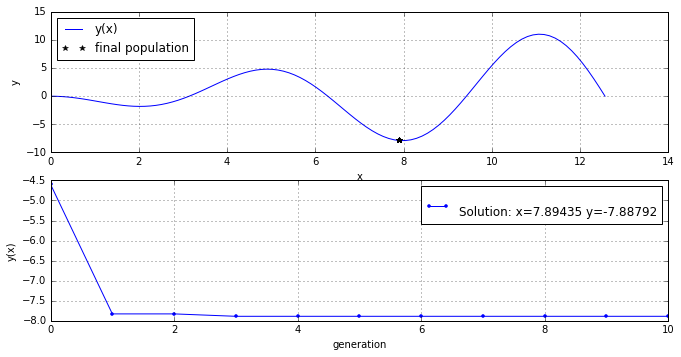

In [64]:
# input data
#ninds  = 10    # number of individuals: population size
#ngenes = 5     # number of genes in the chromosome
ngen   = 10    # number of generations
pc     = 0.8   # probability of crossover
pm     = 0.01  # probability of mutation
elite  = 1     # use elitism
verb   = False # verbose

# run GA
C, Y, OV = Evolve(C, xFcn, objFcn, ngen, elite, verb=verb, showC=False)
X = [xFcn(c) for c in C]

# print and plot
plt.subplot(2, 1, 1)
plt.plot(xcurve, y(xcurve), label='y(x)')
print '\nFinal population:'
PrintPop(C, Y, xFcn)
sol = '\nSolution: x=%g y=%g' % (X[0], Y[0])
print sol

# plot results
plt.subplot(2, 1, 1)
plt.plot(X, Y, 'k*', label='final population')
Gll('x', 'y', 'upper left')

# plot convergence graph
plt.subplot(2, 1, 2)
G = range(ngen+1)
plt.plot(G, OV, 'b.-', label=sol)
Gll('generation', 'y(x)')
plt.show()